# Supervised Machine Learning: Decision Tree

A decision tree is a type of supervised learning algorithm that can be used in classification as well as regressor problems. The input to a decision tree can be both continuous as well as categorical. The decision tree works on an if-then statement.

1. Initially all the training set is considered as a root. 
2. Feature values are preferred to be categorical, if continuous then they are discretized.
3. Records are distributed recursively on the basis of attribute values. 
4. Which attributes are considered to be in root node or internal node is done by using a statistical approach.

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from IPython.display import Image 
from pydot import graph_from_dot_data
import pandas as pd
import numpy as np
from io import StringIO
from sklearn import tree
import matplotlib

## 1. Load Data

In [2]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Categorical.from_codes(iris.target, iris.target_names)

In [3]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
y = pd.get_dummies(y)
y.head()

,setosa,versicolor,virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

## 2. Decision Tree

In [28]:
dt = DecisionTreeClassifier(criterion='gini', 
                            max_depth=None, 
                            min_samples_split=10, 
                            min_samples_leaf=5, ccp_alpha=0.1)
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.1, min_samples_leaf=5, min_samples_split=10)

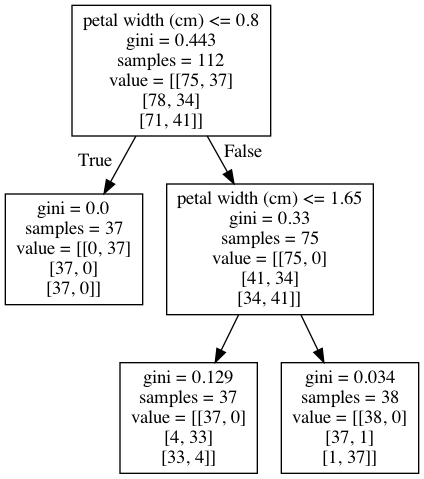

In [29]:
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, feature_names=iris.feature_names)
(graph, ) = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

## 3. Key concepts

There are different attributes which define the split of nodes in a decision tree. 

* **Entropy**: measure of the amount of uncertainty (impurity) in the dataset. Entropy varies from 0 to 1. 0 if all the data belong to a single class and 1 if the class distribution is equal. In this way, entropy will give a measure of impurity in the dataset.
* **Information Gain**: based on the decrease in entropy after a data-set is split on an attribute. A decision tree tries to find the attribute that returns the highest information gain.
* **GINI score**: sum of the square of probability for success and failure (p2+q2).
* **Maximum depth**: a limit to stop the further splitting of nodes when the specified tree depth has been reached, its use its not recommended as the Information Gain won't be zero on every leaf. This is a BAD way to limit the tree.
* **Minimum split size**: a limit to stop the further splitting of nodes when the number of observations in the node is lower than the minimum split size. When a leaf contains too few observations, further splitting will result in overfitting. This is a GOOD way to limit the tree. 
* **Minimum leaf size**: a limit to split a node when the number of observations in one of the child nodes is lower than the minimum leaf size.
* **Pruning**: mostly done to reduce the chances of overfitting the tree to the training data and reduce the overall complexity of the tree.
    - **Pre-prunnig** (early stopping criteria): criteria are set as parameter and the tree stops growing when it meets any of these pre-pruning criteria, or it discovers the pure classes.
    - **Post-prunning**: allow the decision tree to grow fully and observe the CP (Complexity Parameter value, in order to prune the tree later on the optimal CP.


There are few algorithms to find the optimal split:

* **ID3 Algorithm** (Iterative Dichotomiser 3): This solution uses Entropy and Information gain as metrics to form a better decision tree. The attribute with the highest information gain is used as a root node, and a similar approach is followed after that. A leaf node is decided when entropy is zero.
    1. Compute the entropy for the dataset
    2. For every attribute:
        * Calculate entropy for all categorical values.
        * Take average information entropy for the attribute.
        * Calculate gain for the current attribute.
    3. Pick the attribute with the highest information gain.
    4. Repeat until we get the desired tree.
    

* **CART Algorithm** (Classification and Regression trees): uses the GINI index as a cost function to evaluate split in a dataset.
    1. Calculate Gini for subnodes, using formula: sum of the square of probability for success and failure (p2+q2).
    2. Calculate Gini for split using weighted Gini score of each node of that split. Choose the split based on higher Gini value
    
    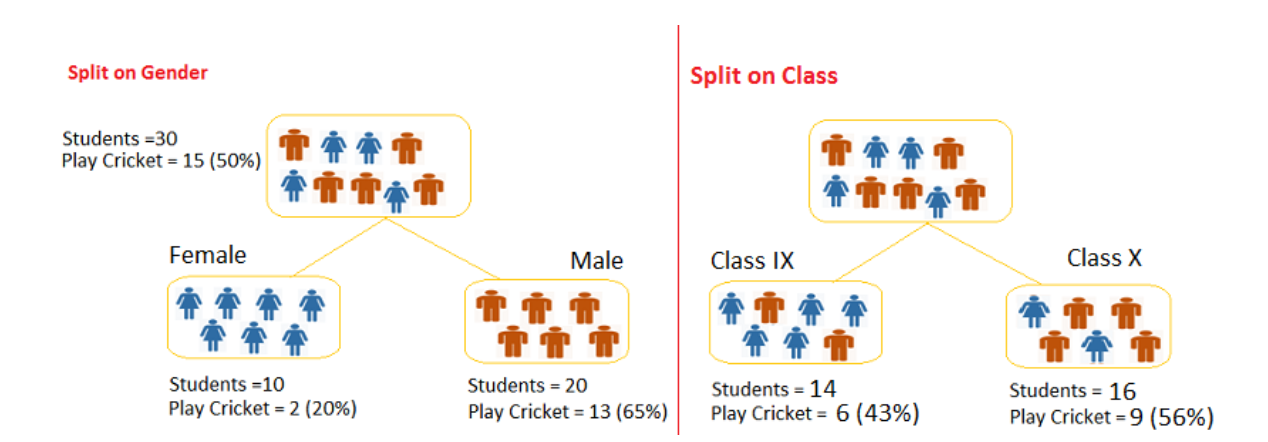

* **Split on Gender**:
    - Gini for sub-node Female = (0.2)*(0.2)+(0.8)*(0.8)=0.68 
    - Gini for sub-node Male = (0.65)*(0.65)+(0.35)*(0.35)=0.55
    - Weighted Gini for Split Gender = (10/30)*0.68+(20/30)*0.55 = 0.59


* Split on Class:
    - Gini for sub-node Class IX = (0.43)*(0.43)+(0.57)*(0.57)=0.51 
    - Gini for sub-node Class X = (0.56)*(0.56)+(0.44)*(0.44)=0.51 
    - Weighted Gini for Split Class = (14/30)*0.51+(16/30)*0.51 = 0.51

## 4. Bias and Variance

**Bias** error is an error from erroneous assumptions in the learning algorithm. High bias can cause an algorithm to miss the relevant relations between features and target outputs (underfitting).

**Variance** is an error from sensitivity to small fluctuations in the training set. High variance can cause an algorithm to model the random noise in the training data, rather than the intended outputs (overfitting).

**Bias–variance trade-off**  is the conflict in trying to simultaneously minimize these two sources of error that prevent supervised learning algorithms from generalizing beyond their training set. 

Decision trees suffer from bias and variance, having a large bias with simple trees and a large variance with complex trees.

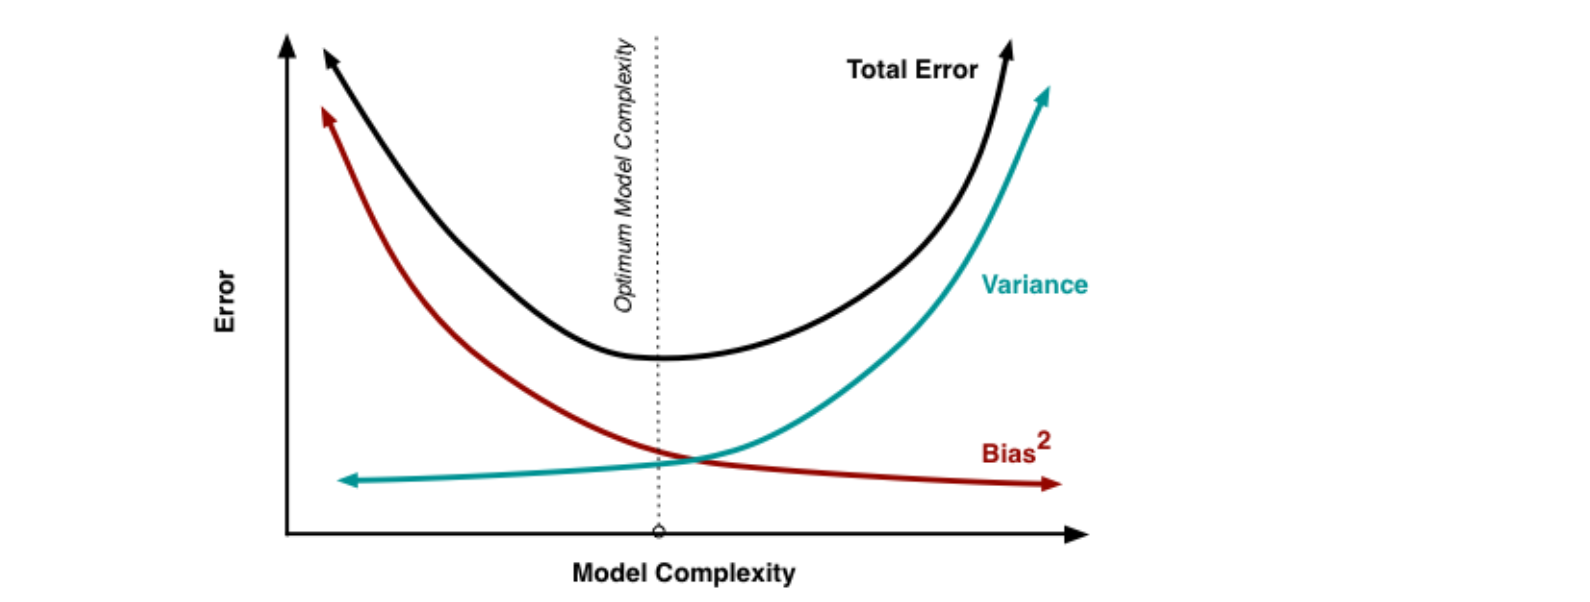